# Figure 6. Class coverage in visual concept neurons.



In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [2]:
cvcl_neuron_descriptions = pd.read_csv('experiments/neuron_labeling/labeled_neurons/cvcl_objects_baby+30k+konk/descriptions.csv')
dino_s_neuron_descriptions = pd.read_csv('experiments/neuron_labeling/labeled_neurons/dino_s_objects_baby+30k+konk/descriptions.csv')

clip_neuron_descriptions = pd.read_csv('experiments/neuron_labeling/labeled_neurons/clip_res_objects_baby+30k+konk/descriptions.csv')
resnext_neuron_descriptions = pd.read_csv('experiments/neuron_labeling/labeled_neurons/resnext_objects_baby+30k+konk/descriptions.csv')

cvcl_random_neuron_descriptions = pd.read_csv('experiments/neuron_labeling/labeled_neurons/cvcl-random_objects_baby+30k+konk/descriptions.csv') 

Plt class and neuron

In [9]:
from src.utils.utils import get_object_classes

classes = get_object_classes(
    '/home/Dataset/xueyi/KonkLab/17-objects',
    vocab_path='data/vocab.json',
    match_type='full'
)

all_classes = classes['all']
seen_classes = classes['seen']
unseen_classes = classes['unseen']

print('all classes:', all_classes)
print('seen classes:', seen_classes)
print('unseen classes:', unseen_classes)


all classes: ['dumbbell', 'cupsaucer', 'hanger', 'watergun', 'crib', 'roadsign', 'knife', 'necklace', 'clock', 'bearteddy', 'cake', 'nunchaku', 'keyboard', 'wineglass', 'trunk', 'patioloungechair', 'christmasstocking', 'cigarette', 'bottle', 'microscope', 'abacus', 'powerstrip', 'orifan', 'chessboard', 'candleholderwithcandle', 'pizza', 'fish hook', 'bonzai', 'goggle', 'exercise_equipment', 'bathsuit', 'rug', 'beermug', 'mp3player', 'toothpaste', 'pitcher', 'backpack', 'axe', 'ring', 'cookingpan', 'fan', 'saltpeppershake', 'compass', 'cookie', 'scissors', 'socks', 'ringbinder', 'hat', 'spoon', 'stamp', 'earings', 'flashlight', 'watch', 'broom', 'binoculars', 'bell', 'tape', 'cherubstatue', 'lei', 'phone', 'umbrella', 'train', 'suitcase', 'nailpolish', 'suit', 'rock', 'saddle', 'airplane', 'cheesegrater', 'headband', 'ball', 'magazinecovers', 'keychain', 'seashell', 'juice', 'bird', 'ceilingfan', 'bucket', 'bowl', 'button', 'sofa', 'coin', 'barbiedoll', 'dollhouse', 'mask', 'christmastr

Coverage Comparison:
                 In-vocab (%)  Out-of-vocab (%)  Total (%)
ResNext50               67.19             58.82      61.50
CLIP-RN50               68.75             55.15      59.50
CVCL-ResNext50          50.00             45.59      47.00
DINO-S-ResNext          56.25             39.71      45.00
CVCL-Randomized         23.44             25.74      25.00


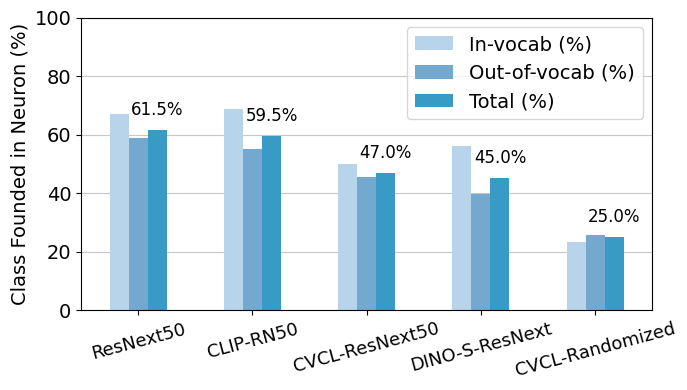

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate coverage
def calculate_coverage(model_classes, baby_seen, baby_unseen):
    all_classes = set(baby_seen + baby_unseen)
    described_classes = set(model_classes['description'].str.lower().unique())
    missing_seen = set(baby_seen) - described_classes
    missing_unseen = set(baby_unseen) - described_classes
    
    seen_coverage = round((len(baby_seen) - len(missing_seen)) / len(baby_seen) * 100, 2)
    unseen_coverage = round((len(baby_unseen) - len(missing_unseen)) / len(baby_unseen) * 100, 2)
    total_coverage = round((len(all_classes) - len(missing_seen.union(missing_unseen))) / len(all_classes) * 100, 2)
    
    return {
        'Seen Coverage': seen_coverage,
        'Unseen Coverage': unseen_coverage,
        'Total Coverage': total_coverage,
        'Missing Seen': missing_seen,
        'Missing Unseen': missing_unseen
    }

# Dictionary of models and their corresponding neuron descriptions
model_descriptions = {
    'ResNext50': resnext_neuron_descriptions,
    'CLIP-RN50': clip_neuron_descriptions,

    # 'DINO A': dino_a_neuron_descriptions,
    # 'DINO Y': dino_y_neuron_descriptions,
    # 'DINO-SAY-ResNext': dino_say_neuron_descriptions,
    'CVCL-ResNext50': cvcl_neuron_descriptions,
    'DINO-S-ResNext': dino_s_neuron_descriptions,

    'CVCL-Randomized': cvcl_random_neuron_descriptions,
}

# Calculate coverage for each model
results = {model: calculate_coverage(desc, seen_classes, unseen_classes) 
           for model, desc in model_descriptions.items()}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({model: {
    'In-vocab (%)': results[model]['Seen Coverage'],
    'Out-of-vocab (%)': results[model]['Unseen Coverage'],
    'Total (%)': results[model]['Total Coverage']
} for model in model_descriptions.keys()}).T

# Ensure all data is numeric
comparison_df = comparison_df.astype(float)

# Display the comparison table
print("Coverage Comparison:")
print(comparison_df.to_string(float_format=lambda x: f'{x:.2f}'))

# Define colors using colormaps
seen_color = plt.cm.Blues(0.3)  # Light blue from Blues colormap
unseen_color = plt.cm.PuBu(0.5)  # Medium blue-purple from PuBu colormap
total_color = plt.cm.GnBu(0.7)  # Darker green-blue from GnBu colormap

# Visualize the results
plt.figure(figsize=(7, 4))
ax = plt.gca()
ax.set_facecolor('white')  # Set axes background to white

ax = comparison_df.plot(kind='bar', ax=ax, width=0.5, 
                  color=[seen_color, unseen_color, total_color],
                  zorder=2) 

# Rotate x-axis labels to normal (0 degrees)
plt.xticks(rotation=15, fontsize=13)

# Set y-axis to 100% coverage
plt.ylim(0, 100)
plt.yticks(fontsize=14)

# plt.title('Neuron Corresponding Class Coverage', fontsize=18, pad=20)
plt.ylabel('Class Founded in Neuron (%)', fontsize=14)
# plt.xlabel('Models', fontsize=18)
plt.legend(loc='upper right', fontsize=14, title_fontsize=14, frameon=True)


# Remove grid
plt.grid(True, axis='y', alpha=0.7, zorder=0)  # Lower alpha for lighter lines, zorder=0 to put grid behind bars

# Add value labels on top of each bar for total coverage only, slightly to the right
for container in ax.containers[2::3]:  # Select every third container starting from the third one (total coverage)
    ax.bar_label(container, 
                 fmt='%.1f%%', 
                 padding=8,  # Reduce padding to align closer to bars
                 label_type='edge',  # Use edge alignment
                 fontsize=12)
    
plt.tight_layout()
# plt.savefig('plots/class_coverage.pdf', dpi=300)
plt.show()